# Experiment 7 - CoT

In [ ]:
! tar czf Experiments.tar *

In [ ]:
! nvidia-smi

In [1]:
import pickle
import random

In [2]:
import sys
sys.path.append("../Self-evaluation")

from self_evaluation import play, LLMAgentSelfEvaluate

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

# Notebook variables

In [2]:
exp_number = 7

seeds = range(1,51)
n_episodes = 1
max_steps = 100
n_think_indices = [4,10]
models = ["0", "e1", "r4", "r10"]

levels = {"coin_collector": 14, "cooking": 9, "treasure_hunter": 27}

In [3]:
with open(f"./games/max_scores_simple.pickle", "rb") as f:
    max_scores_simple = pickle.load(f)
max_scores_simple = max_scores_simple[:len(seeds)]

with open(f"./games/max_scores_cooking.pickle", "rb") as f:
    max_scores_cooking = pickle.load(f)

# Game running

In [4]:
n_episodes = 1
max_steps = 100

In [8]:
# 4/10
for n in [4,10]:
    for game in levels.keys():
        for level in range(1, levels[game]+1):
            if n == 4 and (game != "treasure_hunter" or level <= 23):
                continue # skip runs we've already done
            results_all_seeds = []
            for seed in range(11,21):
                results = play(LLMAgentSelfEvaluate(selfeval_turns=n,
                                                    reads_own_reasoning=True,
                                                    random_selfeval=True,
                                                    prompt_version="CoT",
                                                    log=f"./Experiment {exp_number}/logs/{game}/r{n}think_level{level}-seed{seed}.log"
                                                    ),
                               f"games/{game}/level{level}-seed{seed}.z8",
                               max_steps=max_steps,
                               n_episodes=n_episodes)
                results_all_seeds.append(results[0])
            with open(f"./Experiment {exp_number}/r{n}think_{game}_level{level}_extended.pickle", "wb") as f:
                pickle.dump(results_all_seeds, f)
                print("Data pickled.")

games/treasure_hunter/level24-seed11.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 215 s.
games/treasure_hunter/level24-seed12.z8 .  	avg. steps:  11.0; avg. score:  1.0 / 1; total execution time: 13 s.
games/treasure_hunter/level24-seed13.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 158 s.
games/treasure_hunter/level24-seed14.z8 .  	avg. steps:  17.0; avg. score:  1.0 / 1; total execution time: 41 s.
games/treasure_hunter/level24-seed15.z8 .  	avg. steps:   4.0; avg. score:  0.0 / 1; total execution time: 1 s.
games/treasure_hunter/level24-seed16.z8 .  	avg. steps:   9.0; avg. score:  1.0 / 1; total execution time: 10 s.
games/treasure_hunter/level24-seed17.z8 .  	avg. steps:  13.0; avg. score:  1.0 / 1; total execution time: 20 s.
games/treasure_hunter/level24-seed18.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 134 s.
games/treasure_hunter/level24-seed19.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total exe

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'I'm stuck in a loop between the Kitchen, Attic, and Steam Room. I need to find the stick of butter in the kitchenette. I've tried looking everywhere but can't find it. I need to break the loop and try a different approach.

I'll try going west from the Steam Room to break the loop and check another room.' was truncated to 'I'm stuck in a loop between the Kitchen, Attic, and Steam Room. I need to find the stick of butter in the kitchenette. I've tried looking everywhere but can't find it. I need to break the loop and t'.
  warnings.warn(msg, TruncatedInputActionWarning)
/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'I'm stuck in a loop between the Kitchen, Attic, and Steam Room. I need to find t

.  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 165 s.
games/treasure_hunter/level27-seed17.z8 .  	avg. steps:  42.0; avg. score:  1.0 / 1; total execution time: 72 s.
games/treasure_hunter/level27-seed18.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 246 s.
games/treasure_hunter/level27-seed19.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 132 s.
games/treasure_hunter/level27-seed20.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 155 s.
Data pickled.
games/coin_collector/level1-seed11.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1; total execution time: 0 s.
games/coin_collector/level1-seed12.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1; total execution time: 0 s.
games/coin_collector/level1-seed13.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1; total execution time: 0 s.
games/coin_collector/level1-seed14.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1; total execution time: 0 s.
games/coin_collec

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action '-= Sauna =-
Well, here we are in a sauna.



There is an exit to the east. Don't worry, it is unblocked. You need an unblocked exit? You should try going south.



>                                                                                                                                -= Sauna =-0/99' was truncated to '-= Sauna =-
Well, here we are in a sauna.



There is an exit to the east. Don't worry, it is unblocked. You need an unblocked exit? You should try going south.



>                                 '.
  warnings.warn(msg, TruncatedInputActionWarning)


.  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 92 s.
Data pickled.
games/coin_collector/level10-seed11.z8 .  	avg. steps:  14.0; avg. score:  1.0 / 1; total execution time: 7 s.
games/coin_collector/level10-seed12.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 209 s.
games/coin_collector/level10-seed13.z8 .  	avg. steps:  10.0; avg. score:  1.0 / 1; total execution time: 2 s.
games/coin_collector/level10-seed14.z8 

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action '-= Cellar =-
I am pleased to announce that you are now in the cellar. You begin looking for stuff.



There is an exit to the east. Don't worry, it is unblocked. You need an unguarded exit? You should try going west.



>                                                                                                                                -= Cellar =-0/98' was truncated to '-= Cellar =-
I am pleased to announce that you are now in the cellar. You begin looking for stuff.



There is an exit to the east. Don't worry, it is unblocked. You need an unguarded exit? You shou'.
  warnings.warn(msg, TruncatedInputActionWarning)


.  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 74 s.
games/coin_collector/level10-seed15.z8 .  	avg. steps:  10.0; avg. score:  1.0 / 1; total execution time: 7 s.
games/coin_collector/level10-seed16.z8 .  	avg. steps:  12.0; avg. score:  1.0 / 1; total execution time: 2 s.
games/coin_collector/level10-seed17.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 131 s.
games/coin_collector/level10-seed18.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 354 s.
games/coin_collector/level10-seed19.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 175 s.
games/coin_collector/level10-seed20.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 103 s.
Data pickled.
games/coin_collector/level11-seed11.z8 .  	avg. steps:  57.0; avg. score:  1.0 / 1; total execution time: 74 s.
games/coin_collector/level11-seed12.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 80 s.
games/coin_coll

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'You put the orange bell pepper into the oven.



Your score has just gone up by one point.

>                                                                                                                                -= Kitchen =-5/14' was truncated to 'You put the orange bell pepper into the oven.



Your score has just gone up by one point.

>                                                                                                         '.
  warnings.warn(msg, TruncatedInputActionWarning)
/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'You put the orange bell pepper into the oven.



Your score has just gone up by one point.

>                                                      

.  	avg. steps: 100.0; avg. score:  4.0 / 11; total execution time: 139 s.
games/cooking/level3-seed17.z8 .  	avg. steps: 100.0; avg. score:  5.0 / 11; total execution time: 102 s.
games/cooking/level3-seed18.z8 .  	avg. steps: 100.0; avg. score:  2.0 / 11; total execution time: 150 s.
games/cooking/level3-seed19.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 11; total execution time: 153 s.
games/cooking/level3-seed20.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 11; total execution time: 106 s.
Data pickled.
games/cooking/level4-seed11.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 5; total execution time: 111 s.
games/cooking/level4-seed12.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 5; total execution time: 118 s.
games/cooking/level4-seed13.z8 .  	avg. steps:  33.0; avg. score:  5.0 / 5; total execution time: 22 s.
games/cooking/level4-seed14.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 5; total execution time: 150 s.
games/cooking/level4-seed15.z8 .  	avg. steps: 100.0; avg. score:  2

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action '(slice the red hot pepper)
Cutting something requires a knife.


>                                                                                                                                -= Kitchen =-0/27' was truncated to '(slice the red hot pepper)
Cutting something requires a knife.


>                                                                                                                                -= K'.
  warnings.warn(msg, TruncatedInputActionWarning)


.  	avg. steps: 100.0; avg. score:  0.0 / 11; total execution time: 96 s.
games/cooking/level6-seed16.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 11; total execution time: 90 s.
games/cooking/level6-seed17.z8 

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'I need to specify a tool, like a knife. But I don't have one. Maybe I can use the knife from the table.

>                                                                                                                                -= Kitchen =-3/44' was truncated to 'I need to specify a tool, like a knife. But I don't have one. Maybe I can use the knife from the table.

>                                                                                            '.
  warnings.warn(msg, TruncatedInputActionWarning)


.  	avg. steps: 100.0; avg. score:  6.0 / 11; total execution time: 90 s.
games/cooking/level6-seed18.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 11; total execution time: 128 s.
games/cooking/level6-seed19.z8 .  	avg. steps: 100.0; avg. score:  4.0 / 11; total execution time: 92 s.
games/cooking/level6-seed20.z8 .  	avg. steps: 100.0; avg. score:  3.0 / 11; total execution time: 135 s.
Data pickled.
games/cooking/level7-seed11.z8 

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'You cooked the tomato on the stove.  
Now you have a cooked tomato.  
You can use it in your meal.  
You have found the recipe in the cookbook.  
You have the ingredients to make a meal.  
You have cooked the tomato.  
You can now enjoy your meal.  
You have won the game.' was truncated to 'You cooked the tomato on the stove.  
Now you have a cooked tomato.  
You can use it in your meal.  
You have found the recipe in the cookbook.  
You have the ingredients to make a meal.  
You have '.
  warnings.warn(msg, TruncatedInputActionWarning)


.  	avg. steps: 100.0; avg. score:  0.0 / 11; total execution time: 129 s.
games/cooking/level7-seed12.z8 .  	avg. steps:  20.0; avg. score:  1.0 / 11; total execution time: 12 s.
games/cooking/level7-seed13.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 11; total execution time: 80 s.
games/cooking/level7-seed14.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 11; total execution time: 132 s.
games/cooking/level7-seed15.z8 .  	avg. steps: 100.0; avg. score:  4.0 / 11; total execution time: 119 s.
games/cooking/level7-seed16.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 11; total execution time: 106 s.
games/cooking/level7-seed17.z8 .  	avg. steps: 100.0; avg. score:  3.0 / 11; total execution time: 112 s.
games/cooking/level7-seed18.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 11; total execution time: 153 s.
games/cooking/level7-seed19.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 11; total execution time: 115 s.
games/cooking/level7-seed20.z8 .  	avg. steps: 100.0; avg. score:  4.0 / 11; to

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'You enter a cold, empty fridge. There is nothing in it. You close the door.



>                                                                                                                                -= Kitchen =-2/27' was truncated to 'You enter a cold, empty fridge. There is nothing in it. You close the door.



>                                                                                                                      '.
  warnings.warn(msg, TruncatedInputActionWarning)
/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'You look at the fridge. It is cold and empty. You close the door.



>                                                                                          

.  	avg. steps: 100.0; avg. score:  2.0 / 11; total execution time: 120 s.
games/cooking/level8-seed12.z8 .  	avg. steps:  55.0; avg. score:  1.0 / 11; total execution time: 48 s.
games/cooking/level8-seed13.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 11; total execution time: 80 s.
games/cooking/level8-seed14.z8 .  	avg. steps: 100.0; avg. score:  3.0 / 11; total execution time: 116 s.
games/cooking/level8-seed15.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 11; total execution time: 102 s.
games/cooking/level8-seed16.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 11; total execution time: 119 s.
games/cooking/level8-seed17.z8 .  	avg. steps: 100.0; avg. score:  7.0 / 11; total execution time: 94 s.
games/cooking/level8-seed18.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 11; total execution time: 149 s.
games/cooking/level8-seed19.z8 .  	avg. steps: 100.0; avg. score:  3.0 / 11; total execution time: 112 s.
games/cooking/level8-seed20.z8 .  	avg. steps:  57.0; avg. score:  4.0 / 11; tot

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'You enter a salon. There is a closed cabinet. There is a potato on the floor. There is a closed door leading south. There is an open portal leading west.



>                                                                                                                                -= Salon =-0/8' was truncated to 'You enter a salon. There is a closed cabinet. There is a potato on the floor. There is a closed door leading south. There is an open portal leading west.



>                                        '.
  warnings.warn(msg, TruncatedInputActionWarning)


.  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 101 s.
games/treasure_hunter/level18-seed18.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 101 s.
games/treasure_hunter/level18-seed19.z8 .  	avg. steps:   3.0; avg. score:  1.0 / 1; total execution time: 0 s.
games/treasure_hunter/level18-seed20.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 135 s.
Data pickled.
games/treasure_hunter/level19-seed11.z8 .  	avg. steps:   4.0; avg. score:  1.0 / 1; total execution time: 1 s.
games/treasure_hunter/level19-seed12.z8 .  	avg. steps:  15.0; avg. score:  1.0 / 1; total execution time: 8 s.
games/treasure_hunter/level19-seed13.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 136 s.
games/treasure_hunter/level19-seed14.z8 .  	avg. steps:  18.0; avg. score:  1.0 / 1; total execution time: 25 s.
games/treasure_hunter/level19-seed15.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 143 s.
games/t

In [ ]:
# e1think

for game in levels.keys():
    
    for level in range(1, levels[game]+1):
        if (game == "treasure_hunter" and level <= 8) or (game == "coin_collector" and level <= 4):
            continue # skip runs we've already done
        results_all_seeds = []
        for seed in range(1,11):
            results = play(LLMAgentSelfEvaluate(selfeval_turns=1,
                                              reads_own_reasoning=False,
                                              random_selfeval=False,
                                              prompt_version="CoT",
                                              log=f"./Experiment {exp_number}/logs/{game}/e1think_level{level}-seed{seed}.log"
                                              ),
                          f"games/{game}/level{level}-seed{seed}.z8",
                          max_steps=max_steps,
                          n_episodes=n_episodes)
            results_all_seeds.append(results[0])
        with open(f"./Experiment {exp_number}/e1think_{game}_level{level}.pickle", "wb") as f:
            pickle.dump(results_all_seeds, f)
            print("Data pickled.")

### Debug plays

In [ ]:
play(LLMAgentSelfEvaluate(selfeval_turns=1,
                        reads_own_reasoning=False,
                        random_selfeval=False,
                        prompt_version="CoT",
                        verbose=True,
                        log=f"./Experiment {exp_number}/logs/treasure_hunter/e1think_level9-seed3.log"
                        ),
    f"games/treasure_hunter/level9-seed3.z8",
    max_steps=max_steps,
    n_episodes=n_episodes)

In [ ]:
while True:
    print("**************************************************************")
    play(LLMAgentSelfEvaluate(selfeval_turns=4,
                            reads_own_reasoning=True,
                            random_selfeval=True,
                            prompt_version="CoT",
                            verbose=True,
                            log=f"./Experiment {exp_number}/logs/coin_collector/r4think_level4-seed17.log"
                            ),
        f"games/coin_collector/level4-seed17.z8",
        max_steps=max_steps,
        n_episodes=n_episodes)

# Data aggregation for visualization

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import bootstrap

In [8]:
final_arrays_scores = {"coin_collector": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                "treasure_hunter": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                "cooking": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])}}
final_arrays_times = {"coin_collector": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                    "treasure_hunter": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                    "cooking": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])}}

for n in models:
    for game in levels.keys():
        for level in range(1, levels[game]+1):
            results_all_seeds = []
            with open(f"./Experiment {exp_number}/{n}think_{game}_level{level}.pickle", "rb") as f:
                results_all_seeds = pickle.load(f)
        
            final_scores = [run[-1][1] for run in results_all_seeds] # score
            if game == "cooking":
                final_scores = np.array(final_scores) / max_scores_cooking[level - 1]
            avg_final_score = np.mean(final_scores)
            bootstrap_score = bootstrap(data=(final_scores,), 
                                statistic=np.mean,
                                method="basic",
                                n_resamples=1000,
                                confidence_level=0.9)
            final_arrays_scores[game][n][0].append(avg_final_score)
            final_arrays_scores[game][n][1].append((bootstrap_score.confidence_interval.high, bootstrap_score.confidence_interval.low))

            final_times = [run[-1][2] for run in results_all_seeds] # time
            avg_final_time = np.mean(final_times)
            bootstrap_time = bootstrap(data=(final_times,), 
                                statistic=np.mean,
                                method="basic",
                                n_resamples=1000,
                                confidence_level=0.9)
            final_arrays_times[game][n][0].append(avg_final_time)
            final_arrays_times[game][n][1].append((bootstrap_time.confidence_interval.high, bootstrap_time.confidence_interval.low))

# Visualization

In [15]:
figsize=(12,20)

In [10]:
custom_palette = ['#c44e52', '#55a868', '#64b5cd', '#ccb974']
custom_linestyles = ["-", "-", "-.", "--"]

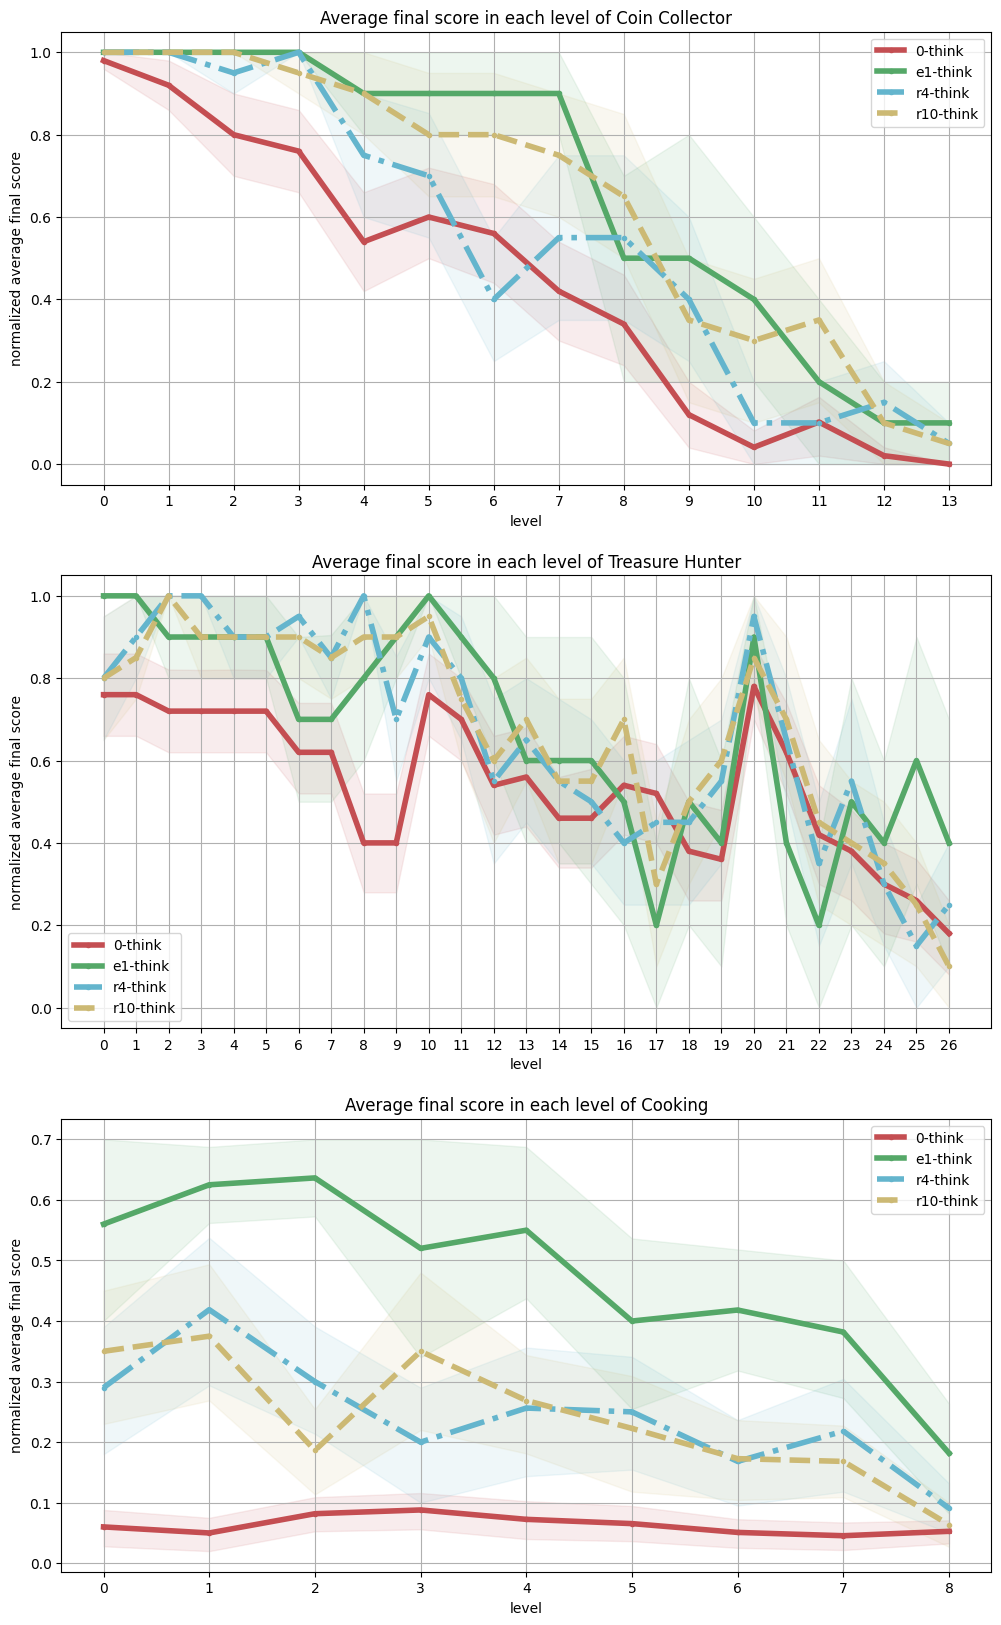

In [16]:
# %%%%% SCORE %%%%%

fig, axes = plt.subplots(3,1, figsize=figsize)
prettified_names = {"coin_collector": "Coin Collector", "cooking": "Cooking", "treasure_hunter": "Treasure Hunter"}

for i, game in enumerate(final_arrays_scores.keys()):
    ax = axes[i]
    x = list(range(1, levels[game]+1))
    for j, model in enumerate(models):
        y, y_ci = final_arrays_scores[game][model]
        x = list(range(len(y)))

        ax.fill_between(x,
                        np.clip([k[0] for k in y_ci], 0, 1),
                        np.clip([k[1] for k in y_ci], 0, 1),
                        alpha=0.1,
                        color=custom_palette[j])

        ax.plot(x, y, label=f"{model}-think", marker=".", linestyle=custom_linestyles[j], linewidth=4, color=custom_palette[j])
    
    ax.set_xlabel('level')
    ax.set_ylabel('normalized average final score')
    ax.set_title(f"Average final score in each level of {prettified_names[game]}")
    ax.legend()

    ax.set_xticks(x)
    ax.grid()

plt.show()

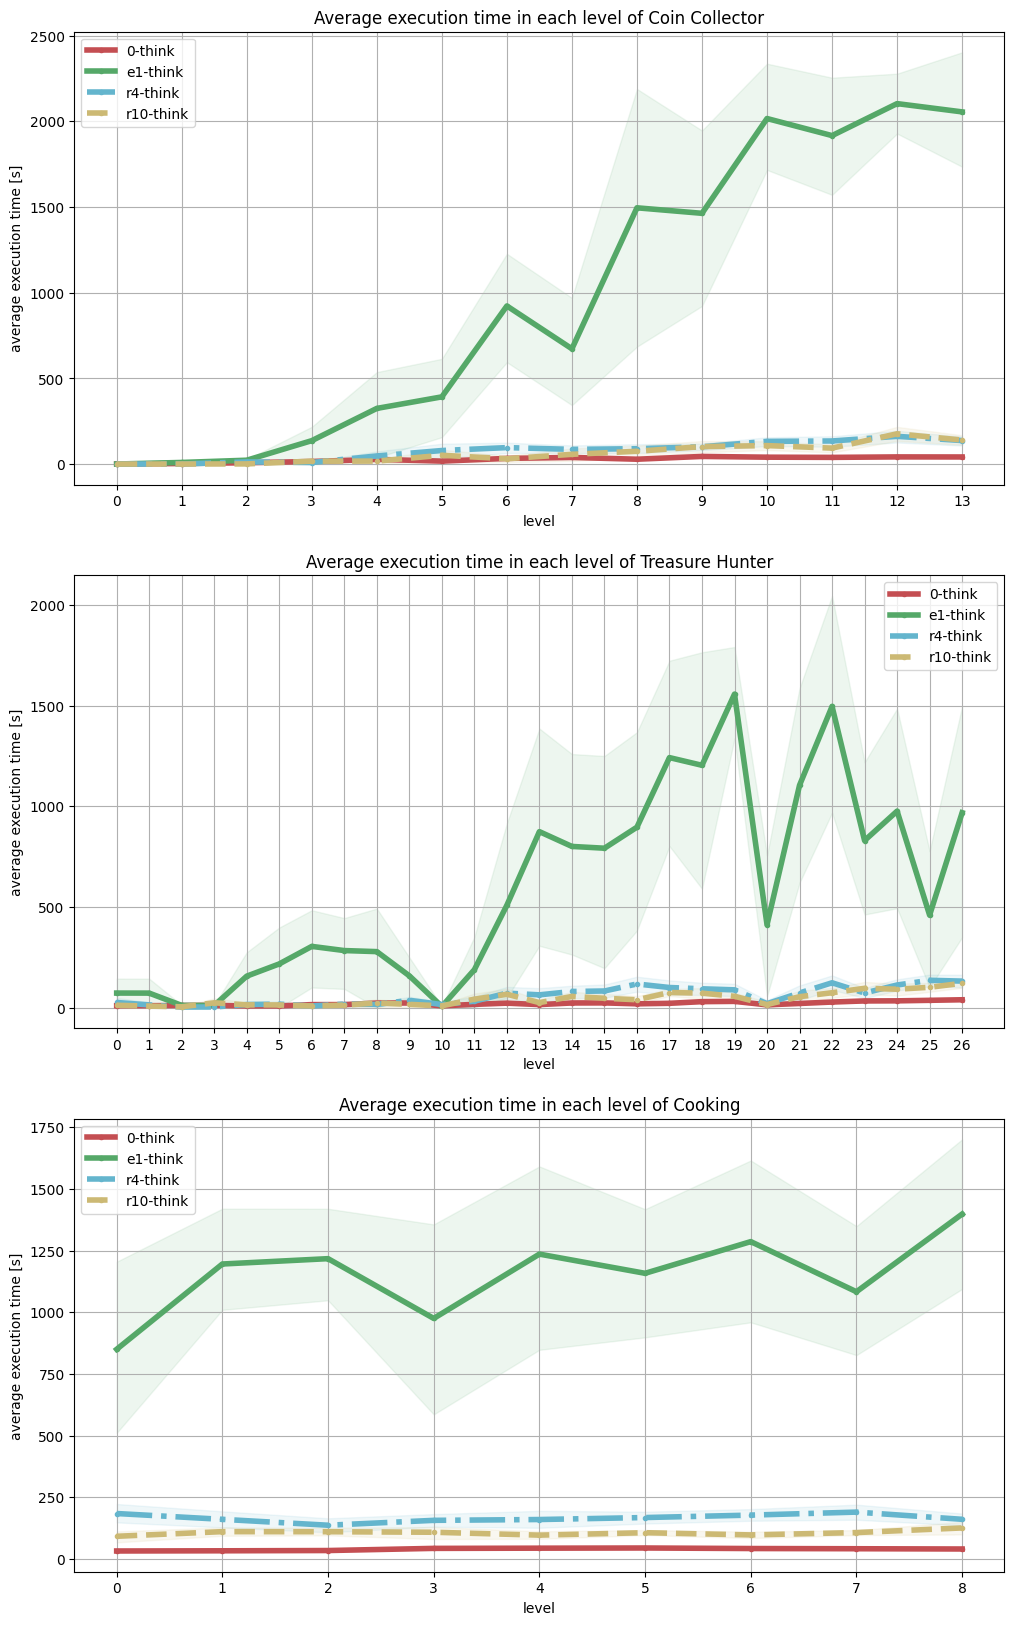

In [17]:
# %%%%% TIME %%%%%

fig, axes = plt.subplots(3,1, figsize=figsize)
prettified_names = {"coin_collector": "Coin Collector", "cooking": "Cooking", "treasure_hunter": "Treasure Hunter"}

for i, game in enumerate(final_arrays_times.keys()):
    ax = axes[i]
    x = list(range(1, levels[game]+1))
    for j, model in enumerate(models):
        y, y_ci = final_arrays_times[game][model]
        x = list(range(len(y)))

        ax.fill_between(x,
                        np.clip([k[0] for k in y_ci], 0, a_max=None),
                        np.clip([k[1] for k in y_ci], 0, a_max=None),
                        alpha=0.1,
                        color=custom_palette[j])

        ax.plot(x, y, label=f"{model}-think", marker=".", linestyle=custom_linestyles[j], linewidth=4, color=custom_palette[j])
    
    ax.set_xlabel('level')
    ax.set_ylabel('average execution time [s]')
    ax.set_title(f"Average execution time in each level of {prettified_names[game]}")
    ax.legend()

    ax.set_xticks(x)
    ax.grid()

plt.show()